In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('data/calories.csv', sep=';')
df.head(5)

,Product,Product calories,Mass,% Protein in cocktail,Protein,Fat,Carbohydrates,Cocktail calories
0,Banana,71,80,0.003828,0.80,0.24,17.60,209
1,Almonds,575,100,0.029762,21.22,49.42,21.67,713
2,Cheddar cheese,150,45,0.039062,11.25,11.70,0.00,288
3,Scrambled eggs with butter,130,60,0.029104,7.80,10.80,0.60,268
4,Boiled chicken,114,84,0.048333,12.18,7.39,0.00,252


In [3]:
model = LinearRegression()
 
X = df[['Mass']]
y = df['Cocktail calories']
 
model.fit(X,y, sample_weight=None)
y_pred = model.predict(X)
 
print('coefficients: ', model.coef_)
print('intercept: ', model.intercept_)
print('Root Mean Squared Error (RMSE): %.2f'% np.sqrt(mean_squared_error(y, y_pred)))
print('Coefficient of determination: %.2f'% r2_score(y, y_pred))

coefficients:  [4.12697095]
intercept:  40.33609958506227
Root Mean Squared Error (RMSE): 93.15
Coefficient of determination: 0.47


## Manual implementation of the code above  

Formulas that we need.  

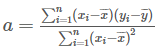

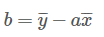

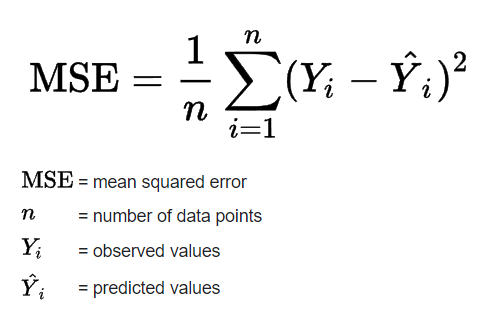

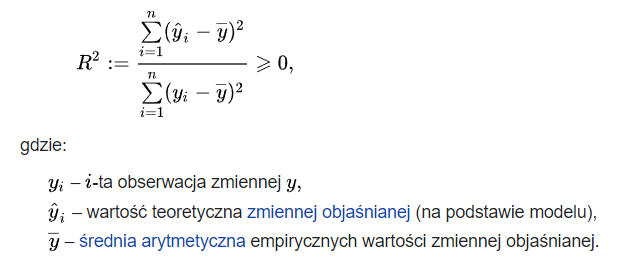

In [4]:
# The same data
X = df['Mass']
y = df['Cocktail calories']

# Model:
# y = ax + b

a = (sum((xi - X.mean()) * (yi - y.mean()) for xi, yi in zip(X, y))) / (sum((xi - X.mean()) ** 2 for xi in X))
b = y.mean() - (a * X.mean())

# We make a prediction for the data on which we trained the model
pred = X.copy()

# Prediction:
y_pred = b + a * pred

MSE = sum((yi - yp) ** 2 for yi, yp in zip(y, y_pred)) / len(y_pred)

# r2 = sum((yi - y_pred.mean()) ** 2 for yi in y) / sum((yp - y_pred.mean()) ** 2 for yp in y_pred)
r2 = sum((yp - y_pred.mean()) ** 2 for yp in y_pred) / sum((yi - y_pred.mean()) ** 2 for yi in y)

print('coefficients: ', a)
print('intercept: ', b)
print('Root Mean Squared Error (RMSE): %.2f'% np.sqrt(MSE))
print('Coefficient of determination: %.2f'% r2)

coefficients:  4.126970954356847
intercept:  40.336099585062215
Root Mean Squared Error (RMSE): 93.15
Coefficient of determination: 0.47


In [5]:
X = df[['Mass', '% Protein in cocktail']]
y = df['Cocktail calories']

model.fit(X,y, sample_weight=None)
y_pred = model.predict(X)
 
print('coefficients: ', model.coef_)
print('intercept: ', model.intercept_)
print('Root Mean Squared Error (RMSE): %.2f'% np.sqrt(mean_squared_error(y, y_pred)))
print('Coefficient of determination: %.2f'% r2_score(y, y_pred))

coefficients:  [  4.14430929 -51.92442285]
intercept:  40.47378590709346
Root Mean Squared Error (RMSE): 93.15
Coefficient of determination: 0.47


In [6]:
X = df[['Protein', 'Fat', 'Carbohydrates']]
y = df['Cocktail calories']
 
model.fit(X,y)
y_pred = model.predict(X)
 
print('coefficients: ', model.coef_)
print('intercept: ', model.intercept_)
print('Root Mean Squared Error (RMSE): %.2f'% np.sqrt(mean_squared_error(y, y_pred)))
print('Coefficient of determination: %.2f'% r2_score(y, y_pred))

coefficients:  [4.19983042 8.39193832 3.8964542 ]
intercept:  139.08940086474263
Root Mean Squared Error (RMSE): 5.34
Coefficient of determination: 1.00
